# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Loading the Dataset

In [3]:
df = pd.read_csv('./data/emails.csv')

In [4]:
df.shape

(5172, 3002)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [8]:
df.head(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df.tail(3)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


# Cleaning

In [10]:
df.drop(columns=['Email No.'], inplace=True)  # Dropping EmailNo. columns

In [11]:
df.isna().sum()  # Dropping null values

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64

In [12]:
df.isna().sum().sum()

0

# Separating Features and Labels

In [13]:
X=df.iloc[:, :df.shape[1]-1]
y=df.iloc[:, -1]

X.shape, y.shape

((5172, 3000), (5172,))

# Splitting the Dataset

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Models

## KNN

In [15]:
scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_train, y_train))

This loop will tell us which k value is giving us best accuracy in the range (1-20)

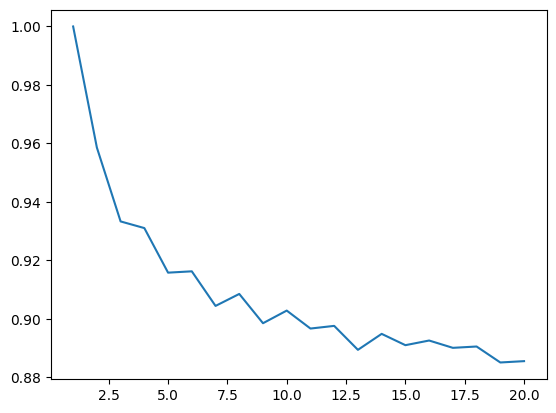

In [16]:
plt.plot(np.arange(1,21), scores)
plt.show()

k = 3, gives the highest accuracy

In [17]:
k = 3

In [18]:
knn = KNeighborsClassifier(n_neighbors=k)  # KNN Model
knn.fit(X_train, y_train) # Training KNN model

KNeighborsClassifier(n_neighbors=3)

In [19]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.85


## SVM

In [20]:
models = {
    "Polynomical SVM":SVC(kernel="poly", degree=2, random_state=8),
    "RBF SVM":SVC(kernel="rbf", random_state=8),
    "Sigmoid SVM":SVC(kernel="sigmoid", random_state=8)
    }

This code defines a dictionary containing three distinct Support Vector Machine (SVM) classifiers, <br>
each utilizing a different kernel function (polynomial, RBF, and sigmoid). 

## Fit and Predict on each SVM model

In [21]:
for model_name, model in models.items():
    y_pred=model.fit(X_train, y_train).predict(X_test)
    print(f"Accuracy for {model_name} model \t: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy for Polynomical SVM model 	: 0.7603092783505154
Accuracy for RBF SVM model 	: 0.8028350515463918
Accuracy for Sigmoid SVM model 	: 0.5966494845360825
